<a href="https://colab.research.google.com/github/Drishtii24/DeepLearning2025-26-DrishtiChauhan/blob/main/ML_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sadiajavedd/students-academic-performance-dataset")

print("Path to dataset files:", path)

100%|██████████| 8.70k/8.70k [00:00<00:00, 9.07MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sadiajavedd/students-academic-performance-dataset/versions/1


In [ ]:
import os

# List files in the downloaded directory
file_names = os.listdir(path)

# Assuming there's only one CSV file and it's the one we want
csv_file = [f for f in file_names if f.endswith('.csv')][0]

# Construct the full path to the CSV file
full_csv_path = os.path.join(path, csv_file)

df = pd.read_csv(full_csv_path)
display(df.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


Data Preprocessing - Encoding Categorical Values

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling
numerical_cols = ['math score', 'reading score', 'writing score']

# Initialize the StandardScaler
scaler = StandardScaler()

# Create a copy of the encoded DataFrame to avoid modifying the original during scaling
df_scaled = df_encoded.copy()

# Apply scaling to the numerical columns
df_scaled[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

display(df_scaled.head())

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0.390024,0.193999,0.391492,False,True,False,False,False,True,False,False,False,False,True,True
1,0.192076,1.427476,1.313269,False,False,True,False,False,False,False,False,True,False,True,False
2,1.577711,1.770109,1.642475,False,True,False,False,False,False,False,True,False,False,True,True
3,-1.259543,-0.833899,-1.583744,True,False,False,False,False,False,False,False,False,False,False,True
4,0.653954,0.605158,0.457333,True,False,True,False,False,False,False,False,True,False,True,True


Data Preprocessing - Splitting Datasets

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_scaled.drop('math score', axis=1)
y = df_scaled['math score']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 14)
X_test shape: (200, 14)
y_train shape: (800,)
y_test shape: (200,)


Linear Regression

Sample dataset created succesfully!
   sqft_living    price
0          650    90000
1          800   120000
2         1000   150000
3         1200  1700000
4         1400   190000
5         1600   210000
6         1800   240000
7         2000   270000
8         2200   290000
9         2500   310000

Model Slope (coefficient):  -17.364771151178864
Model Intercept:  461631.067961165

Train R^2:  0.0002341596530290868
Test R^2:  -8.90360859695185
Train RMSE:  567719.1797328353
Test RMSE:  210519.94791790997


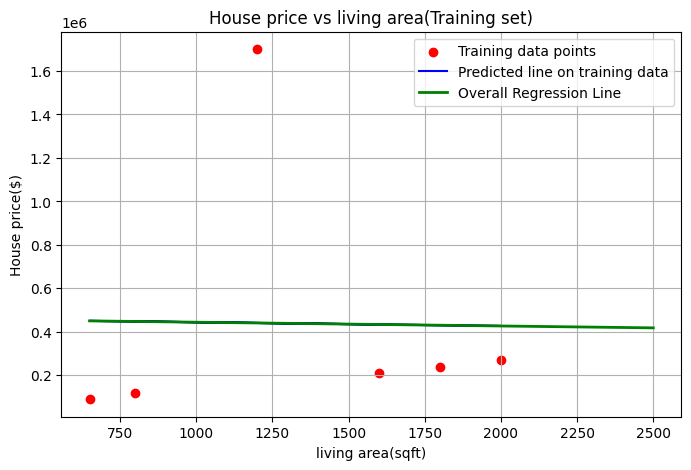

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#create simple dataset manually
data_set = {
    'sqft_living' : [650, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2500],
    'price' : [90000, 120000, 150000, 1700000, 190000, 210000, 240000, 270000, 290000, 310000]
}

#convert to data frame
home_data = pd.DataFrame(data_set)

print("Sample dataset created succesfully!")
print(home_data)

#Prepare feature (X) and target (y)
X = home_data[['sqft_living']].values  #feature must be 2D
y = home_data['price'].values          #target 1D

#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

#Fitting the simple linear regression to the training dataset
from sklearn.linear_model import LinearRegression
Drishti = LinearRegression()
Drishti.fit(X_train.reshape(-1,1), y_train)

#Prediction of test and training set results
y_train_pred = Drishti.predict(X_train.reshape(-1,1))
y_test_pred = Drishti.predict(X_test.reshape(-1,1))

#Print model parameters and simple metrics
print("\nModel Slope (coefficient): ", Drishti.coef_[0])
print("Model Intercept: ", Drishti.intercept_)

from sklearn.metrics import mean_squared_error, r2_score
print("\nTrain R^2: ", r2_score(y_train, y_train_pred))
print("Test R^2: ", r2_score(y_test, y_test_pred))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred))) # Added test RMSE

#visualize the training results with a smooth regression line
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='red', label='Training data points') # Plot actual training data points
plt.plot(X_train, y_train_pred, color='blue', label='Predicted line on training data') # Plot predicted line for training data

#create smooth line for regression across the entire range
line_x = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
line_y = Drishti.predict(line_x)
plt.plot(line_x, line_y, label='Overall Regression Line', color='green', linewidth=2)

plt.title('House price vs living area(Training set)')
plt.xlabel('living area(sqft)')
plt.ylabel('House price($)')
plt.legend()
plt.grid(True)
plt.show()

print()